In [3]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from scipy import signal

In [4]:
fileName = "tone.mp3"

In [5]:
data, samplerate = sf.read(fileName)

print("サンプリング周波数:", samplerate)
print("データ数:", np.shape(data))
print("サンプリング時間:", np.shape(data)[0]/samplerate)

サンプリング周波数: 48000
データ数: (465920,)
サンプリング時間: 9.706666666666667


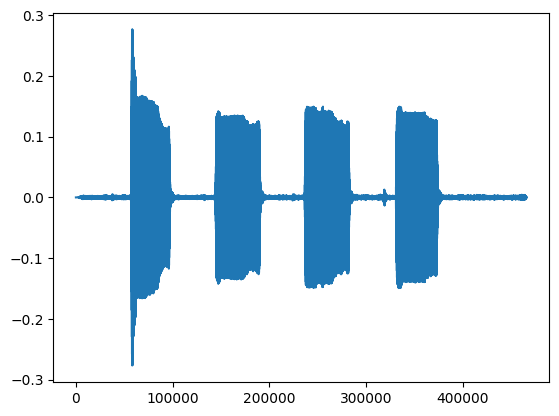

In [6]:
%matplotlib inline

plt.plot(data)
plt.show()

In [7]:
#バターワースフィルタ（バンドパス）
def bandpass(x, samplerate, fp, fs, gpass, gstop):
    # https://atatat.hatenablog.com/entry/data_proc_python5　から丸パクリ
    fn = samplerate / 2 #ナイキスト周波数
    wp = fp / fn  #ナイキスト周波数で通過域端周波数を正規化
    ws = fs / fn  #ナイキスト周波数で阻止域端周波数を正規化
    N, Wn = signal.buttord(wp, ws, gpass, gstop)  #オーダーとバターワースの正規化周波数を計算
    b, a = signal.butter(N, Wn, "band") #フィルタ伝達関数の分子と分母を計算
    y = signal.filtfilt(b, a, x) #信号に対してフィルタをかける
    return y  

In [8]:
fp = np.array([1000,3000])   # 通過域端周波数[Hz]
fs = np.array([500,6000]) # 阻止域端周波数[Hz]
gpass = 3 # 通過域端最大損失[dB]
gstop = 40# 阻止域端最小損失[dB]
 
# バンドパスをする関数を実行
data_bandfilt = bandpass(data, samplerate, fp, fs, gpass, gstop)

これのんとにうまく行ってるのお？と思ったけどうまく行ってそうだな．

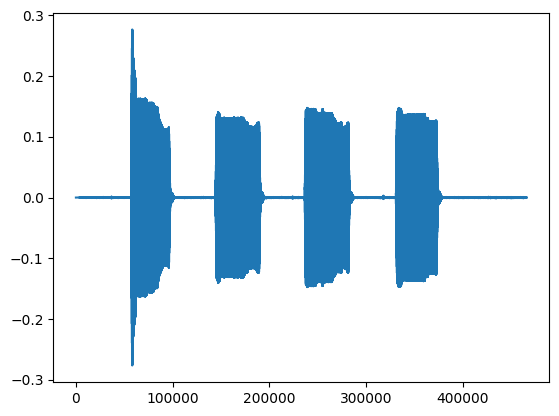

In [9]:
plt.plot(data_bandfilt)
plt.show()

In [10]:
noise = np.random.normal(loc=0, scale=1, size=len(data)) * 0.1

In [11]:
noised_data = data+noise

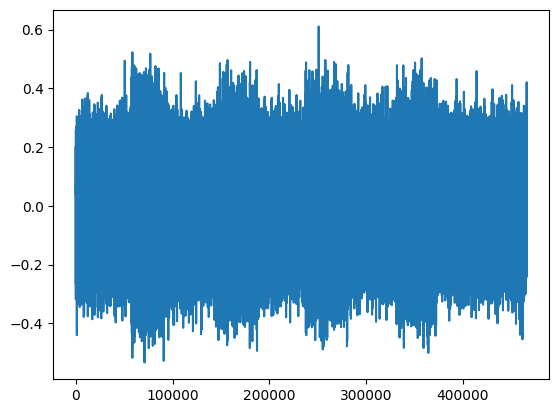

In [12]:
plt.plot(noised_data)
plt.show()

In [22]:
fp = np.array([1200,2200])   # 通過域端周波数[Hz]
fs = np.array([500,6000]) # 阻止域端周波数[Hz]
gpass = 2 # 通過域端最大損失[dB]
gstop = 10# 阻止域端最小損失[dB]
 
# バンドパスをする関数を実行
data_bandfilt = bandpass(data, samplerate, fp, fs, gpass, gstop)

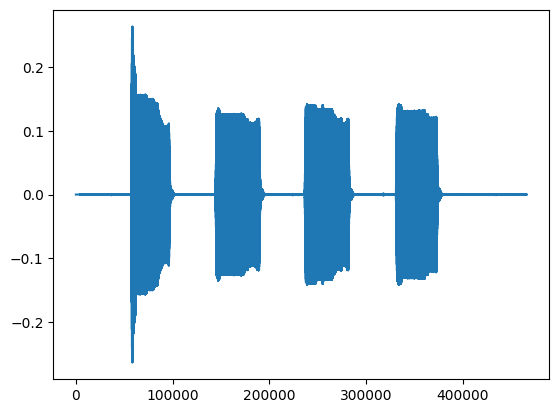

In [23]:
plt.plot(data_bandfilt)
plt.show()

うおーすごい．確かにバンドパスっぽいことができてるみたいだな．

じゃあ次に，信号が0であるところを弾くために微少量だけ全部に足して，それをゴリっと二乗してみる．そうするとゼロ交叉が取れるはず．

In [24]:
# 増加する微少量
delta = 0.1

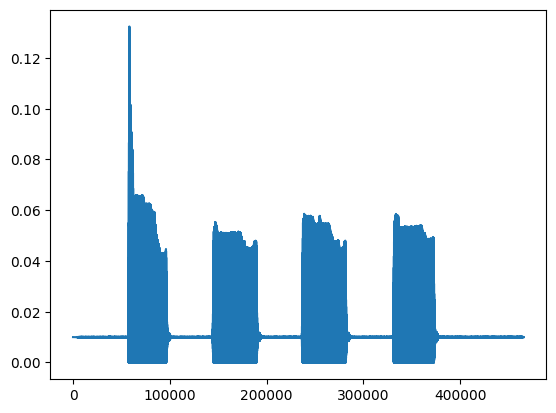

In [37]:
squared = (data_bandfilt+delta)**2
plt.plot(squared)
plt.show()

In [41]:
# ゼロ交叉の回数を見る幅
windowsize = 100
zeroCrossTime = []
xIndex        = []

for i in range(0, len(squared) - windowsize):
    croppedData = squared[i : i+windowsize]
    zeroIndex   = np.where(croppedData <= 0.001)

    xIndex.append(i)
    zeroCrossTime.append(np.shape(zeroIndex)[1])

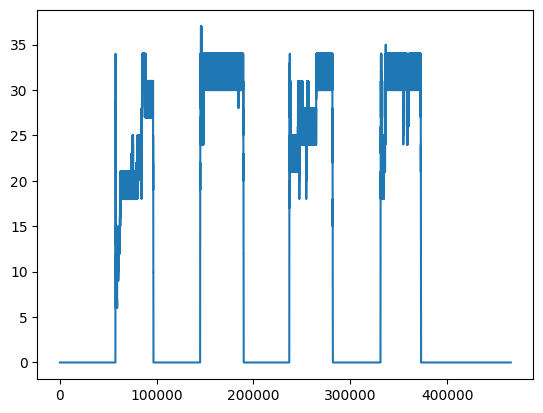

In [42]:
plt.plot(zeroCrossTime)

うお〜確かに，ゼロ交叉の回数で信号の有無を見れるかもしれない．ノイズあり版でも試す

In [43]:
fp = np.array([1200,2200])   # 通過域端周波数[Hz]
fs = np.array([500,6000]) # 阻止域端周波数[Hz]
gpass = 2 # 通過域端最大損失[dB]
gstop = 10# 阻止域端最小損失[dB]
 
# バンドパスをする関数を実行
data_bandfilt = bandpass(noised_data, samplerate, fp, fs, gpass, gstop)

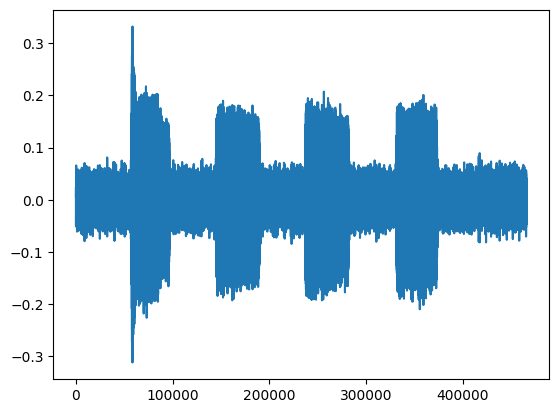

In [44]:
plt.plot(data_bandfilt)
plt.show()

In [45]:
# 増加する微少量
delta = 0.1

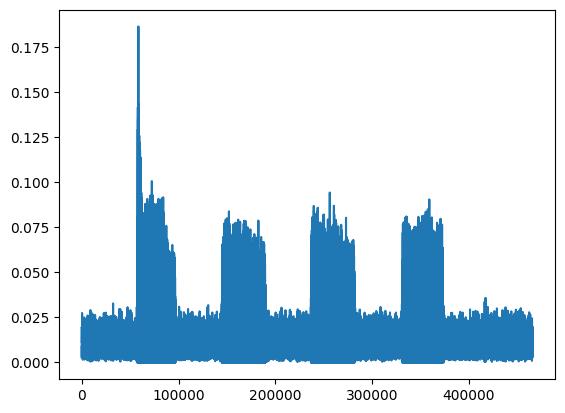

In [46]:
squared = (data_bandfilt+delta)**2
plt.plot(squared)
plt.show()

In [47]:
# ゼロ交叉の回数を見る幅
windowsize = 100
zeroCrossTime = []
xIndex        = []

for i in range(0, len(squared) - windowsize):
    croppedData = squared[i : i+windowsize]
    zeroIndex   = np.where(croppedData <= 0.001)

    xIndex.append(i)
    zeroCrossTime.append(np.shape(zeroIndex)[1])

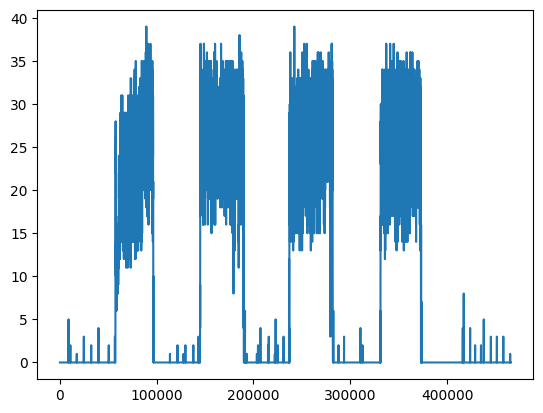

In [49]:
plt.plot(zeroCrossTime)